# First Name: Shubham
# Last Name: Dutt

# Import Libraries  

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt
import scipy.stats
import scipy


# Import Data

In [380]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Task 1 Data management 

In [382]:
#Filling in missing values and converting NaN to '00'
bottle.fillna(00, inplace=True)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500000,33.440000,0.000000,25.649000,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460000,33.440000,0.000000,25.656000,...,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460000,33.437000,0.000000,25.654000,...,0.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450000,33.420000,0.000000,25.643000,...,0.000000,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450000,33.421000,0.000000,25.643000,...,0.000000,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [383]:
bottle.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500000,33.440000,0.000000,25.649000,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460000,33.440000,0.000000,25.656000,...,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460000,33.437000,0.000000,25.654000,...,0.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450000,33.420000,0.000000,25.643000,...,0.000000,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450000,33.421000,0.000000,25.643000,...,0.000000,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,2016-11,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744000,33.408300,5.805000,23.870550,...,0.180000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
864859,34404,864860,093.4 026.4,2016-11,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744000,33.408300,5.805000,23.870720,...,0.180000,2,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
864860,34404,864861,093.4 026.4,2016-11,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692000,33.415000,5.796000,23.889110,...,0.180000,5,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
864861,34404,864862,093.4 026.4,2016-11,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161000,33.406200,5.816000,24.014260,...,0.310000,10,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [384]:
#Setting the date in a standard format (only by year)
bottle['Year'] = bottle['Date'].str[:4]
bottle['Year'] = pd.to_numeric(bottle['Year'])

In [385]:
#Getting data subset - Bottles from 1990 to 2016 as the categorical variable 
task1_sub1 = bottle[(bottle['Year'] >= 1990) & (bottle['Year'] <= 2016)  & (bottle['T_degC'] >= 0) & (bottle['T_degC'] <= 32)] 
task1sub2 = sub1.copy()

In [386]:
#Checking the maximum temperature value
bottle['T_degC'].describe()

count   864863.000000
mean        10.662780
std          4.386508
min          0.000000
25%          7.570000
50%          9.990000
75%         13.830000
max         31.140000
Name: T_degC, dtype: float64

In [387]:
bottle['T_degC'].unique()

array([10.5  , 10.46 , 10.45 , ..., 18.692, 18.161, 17.533])

In [388]:
#Rounding temperatures to nearest whole numbers based on unique values.
unique_whole_numbers = bottle['T_degC'].apply(round).unique()
print(unique_whole_numbers)

[10  9  8  7  6  5  4  3 11 12 13  0 14 20 16 15 17 18 19  2 21 22 23 24
 25 26 27 28 29  1 30 31]


# Task 2 Data Management

In [390]:
bottle['T_degC'] = pd.to_numeric(bottle['T_degC'], errors='coerce') #convert variable to numeric
bottle['PO4uM'] = pd.to_numeric(bottle['PO4uM'], errors='coerce') #convert variable to numeric

In [391]:
#Creating temperature subset
task2_sub1 = bottle[(bottle['T_degC'] >= 0) & (bottle['T_degC'] <= 32) & (bottle['Date'] == "2004-07")]
task2_sub2 = sub1.copy()

In [392]:
task2_sub2['Temperature_Category'] = pd.cut(
    sub2['T_degC'],
    bins=[0, 10, 20, 32],
    labels=["Cold", "Moderate", "Warm"],
    include_lowest=True
).astype('category')

# Verify the categories and distribution
print(sub2['Temperature_Category'].dtype)  # Should print 'category'
print(sub2['Temperature_Category'].value_counts())

category
Temperature_Category
Cold        1046
Moderate     873
Warm          28
Name: count, dtype: int64


In [393]:
task2_sub2['PO4uM_Category'] = pd.cut(
    sub2['PO4uM'],
    bins=[0, 2, 3, 5],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
).astype('category')

# Verify the categories and distribution
print(sub2['PO4uM_Category'].dtype)  # Should print 'category'
print(sub2['PO4uM_Category'].value_counts())

category
PO4uM_Category
Low       1200
Medium     637
High       110
Name: count, dtype: int64


# Task 3 Data Management 

In [395]:
# Already converted above -
# bottle['T_degC'] = pd.to_numeric(bottle['T_degC'],errors='coerce')
# bottle['PO4uM'] = pd.to_numeric(bottle['PO4uM'],errors='coerce')

bottle['SiO3uM'] = pd.to_numeric(bottle['SiO3uM'],errors='coerce')
bottle['O2ml_L'] = pd.to_numeric(bottle['O2ml_L'],errors='coerce')
bottle['Depthm'] = pd.to_numeric(bottle['Depthm'],errors='coerce')

In [396]:
bottle_clean = bottle.dropna()

# Task 4 Data Management 

In [398]:
task4_sub1 = bottle_clean[['SiO3uM', 'T_degC', 'Depthm', 'PO4uM', 'Date']].dropna()
task4_sub1.head()

,SiO3uM,T_degC,Depthm,PO4uM,Date
0,0.000000,10.500000,0,0.000000,1949-03
1,0.000000,10.460000,8,0.000000,1949-03
2,0.000000,10.460000,10,0.000000,1949-03
3,0.000000,10.450000,19,0.000000,1949-03
4,0.000000,10.450000,20,0.000000,1949-03


In [399]:
# center quantitative variables for regression analysis
task4_sub1['SiO3uM_c'] = (sub1['SiO3uM'] - sub1['SiO3uM'].mean())
task4_sub1['T_degC_c'] = (sub1['T_degC'] - sub1['T_degC'].mean())
task4_sub1['Depthm_c'] = (sub1['Depthm'] - sub1['Depthm'].mean())
task4_sub1['PO4uM_c'] = (sub1['PO4uM'] - sub1['PO4uM'].mean())

task4_sub1.head()

,SiO3uM,T_degC,Depthm,PO4uM,Date,SiO3uM_c,T_degC_c,Depthm_c,PO4uM_c
0,0.000000,10.500000,0,0.000000,1949-03,-10.893232,-0.162780,-226.831951,-0.747791
1,0.000000,10.460000,8,0.000000,1949-03,-10.893232,-0.202780,-218.831951,-0.747791
2,0.000000,10.460000,10,0.000000,1949-03,-10.893232,-0.202780,-216.831951,-0.747791
3,0.000000,10.450000,19,0.000000,1949-03,-10.893232,-0.212780,-207.831951,-0.747791
4,0.000000,10.450000,20,0.000000,1949-03,-10.893232,-0.212780,-206.831951,-0.747791


# Task 1 

## Box Plot to show relationship between T_degC and O2ml_L

In [402]:
#Creating categories
sub2['Temperature_Category'] = pd.cut(
    sub2['T_degC'],
    bins=[0, 10, 20, 32],
    labels=["Cold", "Moderate", "Warm"],
    include_lowest=True
).astype('category')

# Verify the categories and distribution
print(sub2['Temperature_Category'].dtype)  # Should print 'category'
print(sub2['Temperature_Category'].value_counts())

category
Temperature_Category
Cold        1046
Moderate     873
Warm          28
Name: count, dtype: int64


In [403]:
bottle['O2ml_L'].describe()

count   864863.000000
mean         2.730883
std          2.294962
min         -0.010000
25%          0.400000
50%          2.460000
75%          5.240000
max         11.130000
Name: O2ml_L, dtype: float64

Text(0.5, 1.0, 'Relationship between T_degC and O2ml_L')

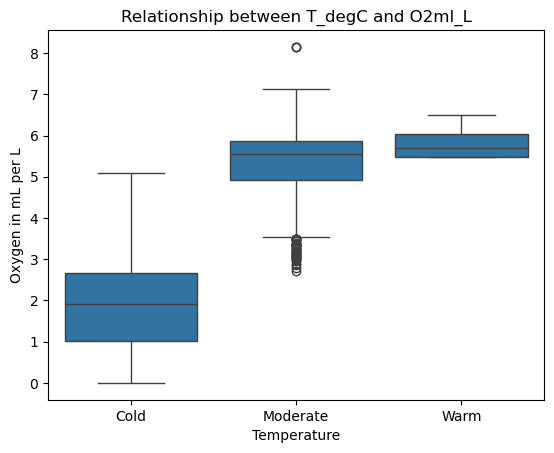

In [404]:
fig = plt.figure()
sns.boxplot(x='Temperature_Category', y='O2ml_L', data=sub2)
plt.xlabel('Temperature')
plt.ylabel('Oxygen in mL per L')
plt.title("Relationship between T_degC and O2ml_L")

# ANOVA

In [406]:
model1 = smf.ols(formula='O2ml_L ~ C(Temperature_Category)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 O2ml_L   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3000.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:48:26   Log-Likelihood:                -2702.0
No. Observations:                1947   AIC:                             5410.
Df Residuals:                    1944   BIC:                             5427.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [407]:
sub3 = sub2[['O2ml_L', 'Temperature_Category']].dropna()

### Mean values

In [409]:
print ('Means for O2ml_L by Temperature levels')
m1 = sub3.groupby('Temperature_Category').mean()
print (m1)

Means for O2ml_L by Temperature levels
                       O2ml_L
Temperature_Category         
Cold                 1.924130
Moderate             5.321237
Warm                 5.834643


C:\Users\sunor\AppData\Local\Temp\ipykernel_19680\3571020550.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m1 = sub3.groupby('Temperature_Category').mean()


### STD values

In [411]:
print ('Standard Deviations for O2ml_L by Temperature levels')
sd1 = sub3.groupby('Temperature_Category').std()
print (sd1)

Standard Deviations for O2ml_L by Temperature levels
                       O2ml_L
Temperature_Category         
Cold                 1.056161
Moderate             0.869822
Warm                 0.378354


C:\Users\sunor\AppData\Local\Temp\ipykernel_19680\3109909942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sd1 = sub3.groupby('Temperature_Category').std()


# Task 2

## Bar Plot to show relationship between phosphate concentration and temperature

In [414]:
task2_sub2['Temperature_Category'] = pd.cut(
    task2_sub2['T_degC'],
    bins=[0, 10, 20, 32],
    labels=["Cold", "Moderate", "Warm"],
    include_lowest=True
).astype('category')

task2_sub2['PO4uM_Category'] = pd.cut(
    task2_sub2['PO4uM'],
    bins=[0, 2, 3, 5],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
).astype('category')


C:\Users\sunor\AppData\Local\Temp\ipykernel_19680\4283099085.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


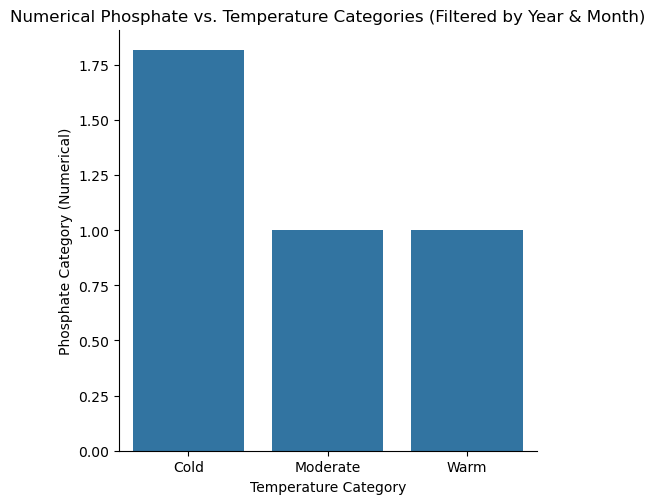

In [415]:
# Filter task2_sub1 by date and other conditions
task2_sub1 = bottle[
    (bottle['T_degC'] >= 0) &
    (bottle['T_degC'] <= 32) &
    (bottle['Date'] == "2004-07")  # Keep date filter applied
]

# Create a copy of task2_sub1 for task2_sub2
task2_sub2 = task2_sub1.copy()

# Categorize temperature
task2_sub2['Temperature_Category'] = pd.cut(
    task2_sub2['T_degC'],
    bins=[0, 10, 20, 32],
    labels=["Cold", "Moderate", "Warm"],
    include_lowest=True
)

# Categorize phosphate levels
task2_sub2['PO4uM_Category'] = pd.cut(
    task2_sub2['PO4uM'],
    bins=[0, 2, 3, 5],
    labels=["Low", "Medium", "High"],
    include_lowest=True
)

# Recoding for numerical categories (if needed for plotting)
temperature_recode = {"Cold": 1, "Moderate": 2, "Warm": 3}
phosphate_recode = {"Low": 1, "Medium": 2, "High": 3}

task2_sub2['Temperature_Num'] = task2_sub2['Temperature_Category'].map(temperature_recode)
task2_sub2['Phosphate_Num'] = task2_sub2['PO4uM_Category'].map(phosphate_recode)

# Plot the data
sns.catplot(
    x="Temperature_Category",
    y="Phosphate_Num",
    data=task2_sub2,
    kind="bar",
    ci=None
)
plt.xlabel("Temperature Category")
plt.ylabel("Phosphate Category (Numerical)")
plt.gca().invert_yaxis()
plt.title("Numerical Phosphate vs. Temperature Categories (Filtered by Year & Month)")
plt.show()


## Contingency table of observed counts between phosphate concentration and temperature

In [417]:
ct1=pd.crosstab(task2_sub2['PO4uM_Category'], task2_sub2['Temperature_Category'])
print("Contingency Table of observed counts between phosphate concentration and temperature:" + "\n")
print (ct1) 

Contingency Table of observed counts between phosphate concentration and temperature:

Temperature_Category  Cold  Moderate  Warm
PO4uM_Category                            
Low                    299       873    28
Medium                 637         0     0
High                   110         0     0


## Crosstab of expected numbers

In [419]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
Chi2ContingencyResult(statistic=1043.9949880497134, pvalue=1.0420015994632398e-224, dof=4, expected_freq=array([[644.68412943, 538.05855162,  17.25731895],
       [342.21982537, 285.61941448,   9.16076014],
       [ 59.0960452 ,  49.3220339 ,   1.5819209 ]]))


## Contingency table of observed precentages between phosphate concentration and temperature

In [421]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print("Contingency Table of observed percentage between phosphate concentration and temperature:" + "\n")
print(colpct)

Contingency Table of observed percentage between phosphate concentration and temperature:

Temperature_Category     Cold  Moderate     Warm
PO4uM_Category                                  
Low                  0.285851  1.000000 1.000000
Medium               0.608987  0.000000 0.000000
High                 0.105163  0.000000 0.000000


## Post-Hoc analysis between phosphate concentration and temperature  

In [423]:
# Copy the subset
task2_sub3 = task2_sub2.copy()

# Define categories for pairwise comparisons
categories_temp = ["Cold", "Moderate", "Warm"]
categories_phosphate = ["Low", "Medium", "High"]

for x in range(len(categories_temp)):  # Loop over temperature categories
    for y in range(len(categories_phosphate)):  # Loop over phosphate categories
        # Recode temperature and phosphate categories
        recode_temp = {categories_temp[x]: 1, categories_temp[(x + 1) % len(categories_temp)]: 0}
        recode_phosphate = {categories_phosphate[y]: 1, categories_phosphate[(y + 1) % len(categories_phosphate)]: 0}

        # Map the recoded values
        task2_sub3['temp'] = task2_sub3['Temperature_Category'].map(recode_temp)
        task2_sub3['phosphate'] = task2_sub3['PO4uM_Category'].map(recode_phosphate)

        # Drop rows with NaN after mapping
        task2_sub3_filtered = task2_sub3.dropna(subset=['temp', 'phosphate'])

        # Create the contingency table
        cont_table = pd.crosstab(task2_sub3_filtered['temp'], task2_sub3_filtered['phosphate'])

        # Skip if contingency table is empty
        if cont_table.size == 0:
            print(f"No data for categories: {categories_temp[x]} vs {categories_phosphate[y]}")
            continue

        # Perform Chi-Square test
        chi2_result = scipy.stats.chi2_contingency(cont_table)
        print(f"{categories_temp[x]} vs {categories_phosphate[y]}: Chi2 = {chi2_result[0]}, p = {chi2_result[1]}")


Cold vs Low: Chi2 = 914.0603480702176, p = 8.615810647339921e-201
Cold vs Medium: Chi2 = 0.0, p = 1.0
Cold vs High: Chi2 = 253.41176193331495, p = 4.6845140512741054e-57
Moderate vs Low: Chi2 = 0.0, p = 1.0
No data for categories: Moderate vs Medium
Moderate vs High: Chi2 = 0.0, p = 1.0
Warm vs Low: Chi2 = 53.18083537822712, p = 3.0421233721046605e-13
Warm vs Medium: Chi2 = 0.0, p = 1.0
Warm vs High: Chi2 = 8.686546729451356, p = 0.0032056741617699216


# Task 3

## Correlations

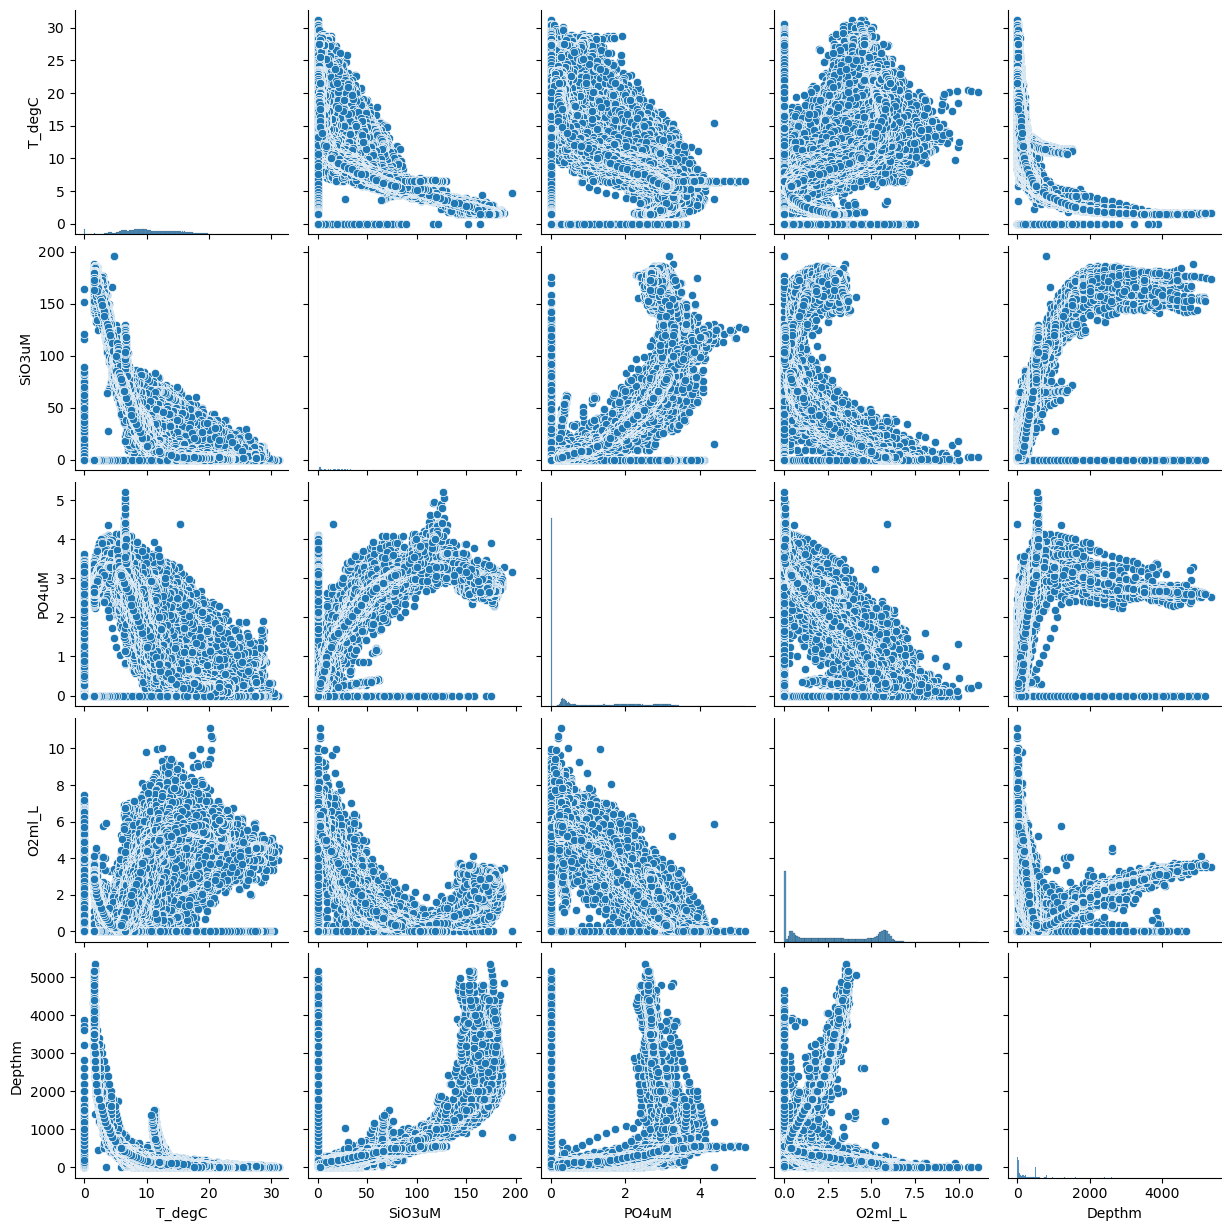

In [426]:
#Overview of different variable relations
sns.pairplot(bottle_clean[['T_degC', 'SiO3uM', 'PO4uM', 'O2ml_L', 'Depthm']])

## Scatterplot w/ regression line to show relation between phosphate concentration (x = PO4uM) and silicate concentration (y=SiO3uM)

Text(0.5, 1.0, 'Scatterplot for the Association Between Silicate\nPhosphate concentration')

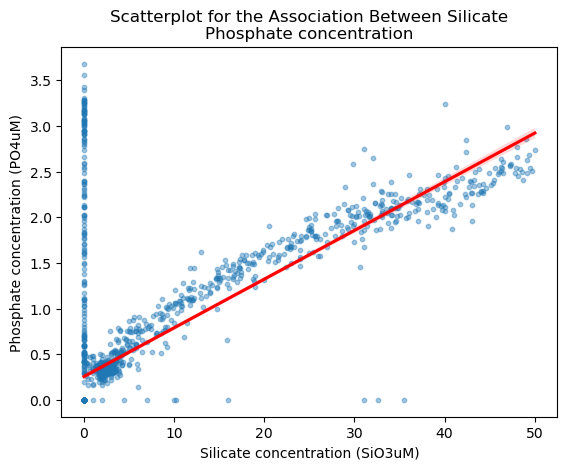

In [428]:
filtered_data_task3 = bottle_clean[(bottle_clean['PO4uM'] >= 0) & (bottle_clean['PO4uM'] <= 50) & (bottle_clean['SiO3uM'] >= 0) & (bottle_clean['SiO3uM'] <= 50)].sample(n=2000, random_state=42)
#filtered_sio3um = bottle_clean[(bottle_clean['SiO3uM'] >= 0) & (bottle_clean['SiO3uM'] <= 5)]

%matplotlib inline
plt.figure()
#scat1 = sns.regplot(x="R_NO3", y="R_PO4", fit_reg=False, data=filtered_data_task3)
sns.regplot(
    x="SiO3uM",
    y="PO4uM",
    data=filtered_data_task3,
    fit_reg=True, 
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.4, 's': 10}  # Set transparency and marker size
)
plt.xlabel('Silicate concentration (SiO3uM)')
plt.ylabel('Phosphate concentration (PO4uM)')
plt.title('Scatterplot for the Association Between Silicate' + '\n' + 'Phosphate concentration')

In [429]:
import scipy

print ('Association between Depth and Silicate concentration')
print (scipy.stats.pearsonr(filtered_data_task3['SiO3uM'], filtered_data_task3['PO4uM']))

Association between Depth and Silicate concentration
PearsonRResult(statistic=0.7224395265227637, pvalue=1.7e-322)


## Regression Analysis

In [431]:
import statsmodels.formula.api as smf

print ('\n' + "OLS regression model for the association between Silicate and Phosphate concentration" + '\n\n')
reg1 = smf.ols('SiO3uM ~ PO4uM', data=filtered_data_task3).fit()
print (reg1.summary())


OLS regression model for the association between Silicate and Phosphate concentration


                            OLS Regression Results                            
Dep. Variable:                 SiO3uM   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     2181.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.63e-322
Time:                        16:49:27   Log-Likelihood:                -7051.9
No. Observations:                2000   AIC:                         1.411e+04
Df Residuals:                    1998   BIC:                         1.412e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

## Residual plot 

Text(0.5, 1.0, 'Residual plot')

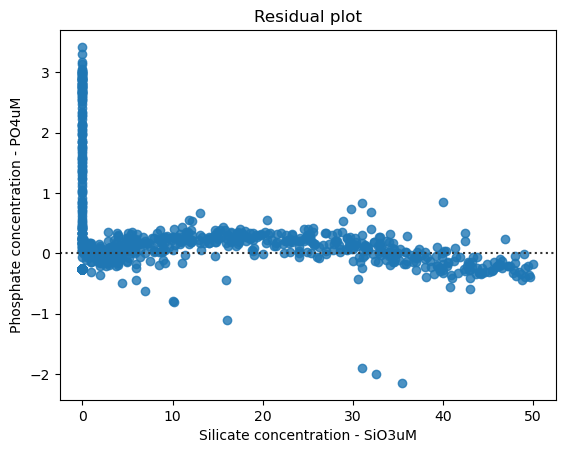

In [433]:
%matplotlib inline
plt.figure()
scat1 = sns.residplot(x="SiO3uM", y="PO4uM", data=filtered_data_task3)
plt.xlabel('Silicate concentration - SiO3uM')
plt.ylabel('Phosphate concentration - PO4uM')
plt.title('Residual plot')

# Task 4

## Correlation between each explantory variable and response variable

In [436]:
filtered_data_task4 = sub1[(sub1['SiO3uM_c'] >= 0) & (sub1['SiO3uM_c'] <= 50) 
& (sub1['PO4uM_c'] >= 0) & (sub1['PO4uM_c'] <= 4) 
& (sub1['Depthm_c'] <= sub1['Depthm_c'].max())
& (sub1['T_degC_c'] <= sub1['T_degC_c'].max())
& (sub1['Date'] == "2010-08")]

PearsonRResult(statistic=-0.9290266530484608, pvalue=0.0)


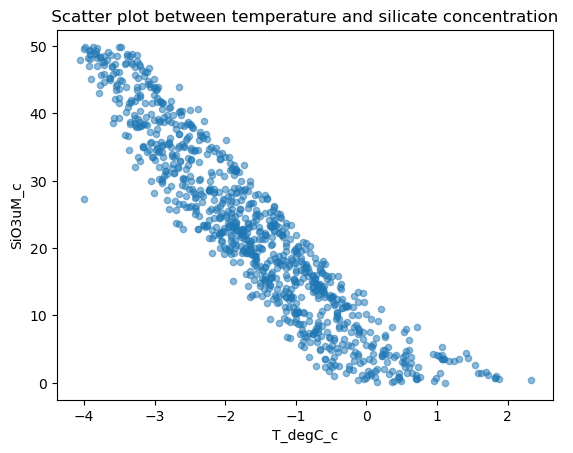

In [437]:
%matplotlib inline
plt.figure()
scat1 = sns.regplot(x="T_degC_c", y="SiO3uM_c", fit_reg=False, data=filtered_data_task4, scatter_kws={'alpha': 0.5, 's': 20})
plt.title(" Scatter plot between temperature and silicate concentration ")

print (scipy.stats.pearsonr(filtered_data_task4['T_degC_c'], filtered_data_task4['SiO3uM_c']))

PearsonRResult(statistic=0.8742986062449702, pvalue=8.749650838393631e-301)


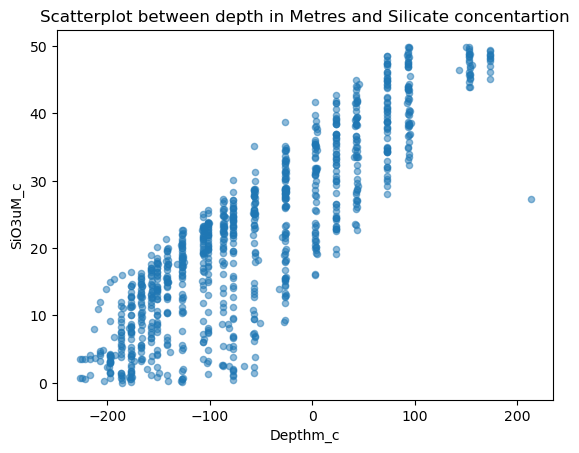

In [438]:
%matplotlib inline
plt.figure()
scat1 = sns.regplot(x="Depthm_c", y="SiO3uM_c", fit_reg=False, data=filtered_data_task4, scatter_kws={'alpha': 0.5, 's': 20})
plt.title("Scatterplot between depth in Metres and Silicate concentartion")

print (scipy.stats.pearsonr(filtered_data_task4['Depthm_c'], filtered_data_task4['SiO3uM_c']))

PearsonRResult(statistic=0.9701515349038, pvalue=0.0)


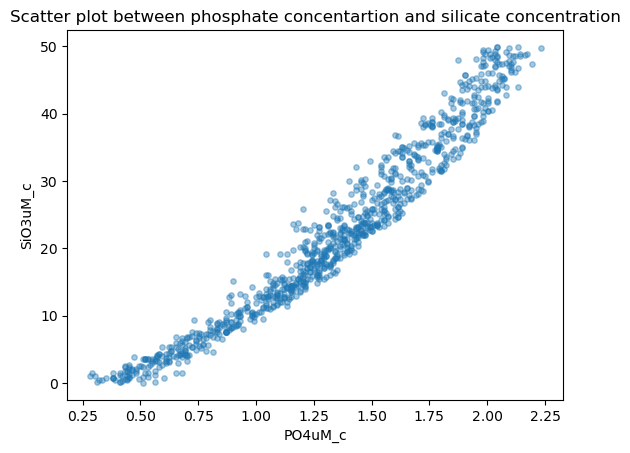

In [439]:
%matplotlib inline
plt.figure()
scat1 = sns.regplot(x="PO4uM_c", y="SiO3uM_c", fit_reg=False, data=filtered_data_task4, scatter_kws={'alpha': 0.4, 's': 15})
plt.title("Scatter plot between phosphate concentartion and silicate concentration")

print (scipy.stats.pearsonr(filtered_data_task4['PO4uM_c'], filtered_data_task4['SiO3uM_c']))

## Regression analysis for each candidate

### Individual variable testing

In [442]:
import statsmodels.formula.api as smf
    
print ("OLS regression model for the association between T_degC_c (x) and SiO3uM_c (y)" + "\n" + "\n")
reg1 = smf.ols('SiO3uM_c ~ T_degC_c', data=filtered_data_task4).fit()
print (reg1.summary())

OLS regression model for the association between T_degC_c (x) and SiO3uM_c (y)


                            OLS Regression Results                            
Dep. Variable:               SiO3uM_c   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     5995.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:49:28   Log-Likelihood:                -2868.3
No. Observations:                 953   AIC:                             5741.
Df Residuals:                     951   BIC:                             5750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [443]:
import statsmodels.formula.api as smf
    
print ("OLS regression model for the association between Depthm_c(x) and SiO3uM_c (y)" + "\n" + "\n")
reg2 = smf.ols('SiO3uM_c ~ Depthm_c', data=filtered_data_task4).fit()
print (reg2.summary())

OLS regression model for the association between Depthm_c(x) and SiO3uM_c (y)


                            OLS Regression Results                            
Dep. Variable:               SiO3uM_c   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3085.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          8.75e-301
Time:                        16:49:28   Log-Likelihood:                -3127.0
No. Observations:                 953   AIC:                             6258.
Df Residuals:                     951   BIC:                             6268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [444]:
import statsmodels.formula.api as smf
    
print ("OLS regression model for the association between PO4uM_c(x) and SiO3uM_c(y)" + "\n" + "\n")
reg3 = smf.ols('SiO3uM_c ~ PO4uM_c', data=filtered_data_task4).fit()
print (reg3.summary())

OLS regression model for the association between PO4uM_c(x) and SiO3uM_c(y)


                            OLS Regression Results                            
Dep. Variable:               SiO3uM_c   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.522e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:49:28   Log-Likelihood:                -2465.6
No. Observations:                 953   AIC:                             4935.
Df Residuals:                     951   BIC:                             4945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### Testing all variables with SiO3uM

In [446]:
import statsmodels.formula.api as smf
    
print ("OLS regression model for the association between PO4uM_c (x1) T_degC_c(x2), Depthm_c (x3) and SiO3uM_c(y)" + "\n" + "\n")
reg4 = smf.ols('SiO3uM_c ~ PO4uM_c + T_degC_c + Depthm_c ', data=filtered_data_task4).fit()
print (reg4.summary())

OLS regression model for the association between PO4uM_c (x1) T_degC_c(x2), Depthm_c (x3) and SiO3uM_c(y)


                            OLS Regression Results                            
Dep. Variable:               SiO3uM_c   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:49:28   Log-Likelihood:                -1985.2
No. Observations:                 953   AIC:                             3978.
Df Residuals:                     949   BIC:                             3998.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Testing strong corellation variables with SiO3uM

In [448]:
import statsmodels.formula.api as smf
    
print ("OLS regression model for the association between PO4uM_c (x1),Depthm_c (x2) and SiO3uM_c (y)" + "\n" + "\n")
reg5 = smf.ols('SiO3uM_c ~ PO4uM_c + Depthm_c ', data=filtered_data_task4).fit()
print (reg5.summary())

OLS regression model for the association between PO4uM_c (x1),Depthm_c (x2) and SiO3uM_c (y)


                            OLS Regression Results                            
Dep. Variable:               SiO3uM_c   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.965e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:49:28   Log-Likelihood:                -2030.5
No. Observations:                 953   AIC:                             4067.
Df Residuals:                     950   BIC:                             4082.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## Q-Q plot for each candidate 

Text(0.5, 1.0, 'Residual plot for SiO3uM_c ~ T_degC_c')

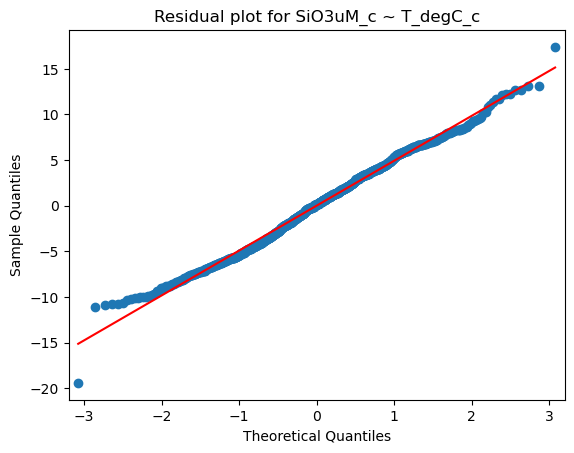

In [450]:
import statsmodels.api as sm
fig1= sm.qqplot(reg1.resid, line='r')
plt.title('Residual plot for SiO3uM_c ~ T_degC_c')

Text(0.5, 1.0, 'SiO3uM_c ~ Depthm_c')

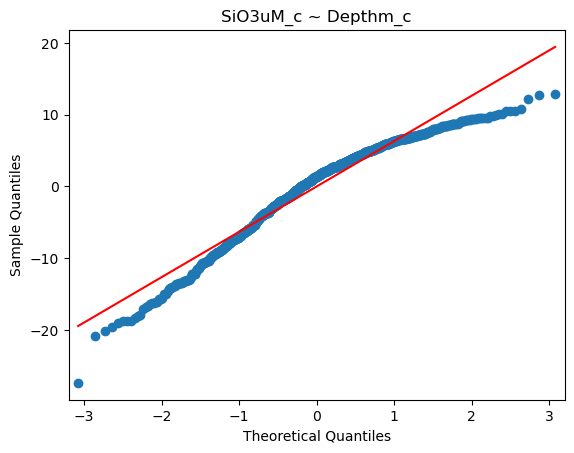

In [451]:
import statsmodels.api as sm
fig2= sm.qqplot(reg2.resid, line='r')
plt.title('SiO3uM_c ~ Depthm_c')

Text(0.5, 1.0, 'QQ plot for SiO3uM_c ~ PO4uM_c')

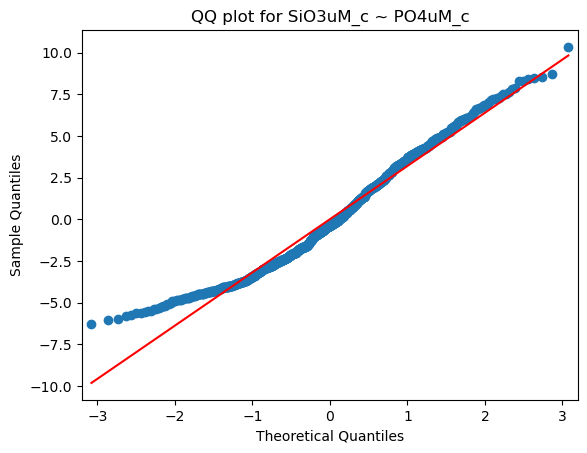

In [452]:
import statsmodels.api as sm
fig3= sm.qqplot(reg3.resid, line='r')
plt.title('QQ plot for SiO3uM_c ~ PO4uM_c')

Text(0.5, 1.0, 'QQ plot for all variables regression analysis')

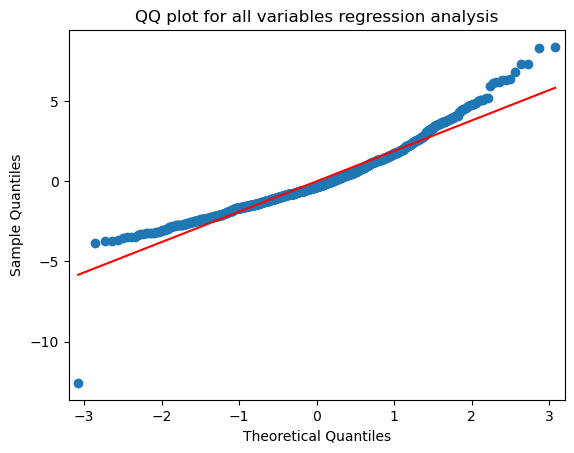

In [453]:
import statsmodels.api as sm
fig4 = sm.qqplot(reg4.resid, line='r')
plt.title('QQ plot for all variables regression analysis')

Text(0.5, 1.0, 'QQ plot for strong  variables regression analysis')

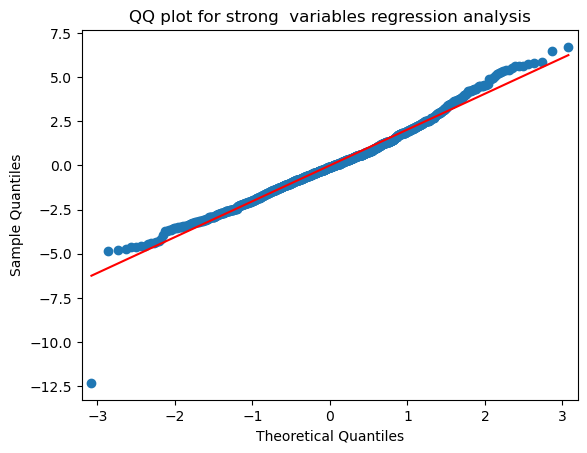

In [454]:
import statsmodels.api as sm
fig5 = sm.qqplot(reg5.resid, line='r')
plt.title('QQ plot for strong  variables regression analysis')

## Standardized residual plots

Text(0.5, 1.0, 'Residual plot for SiO3uM_c ~ T_degC_c')

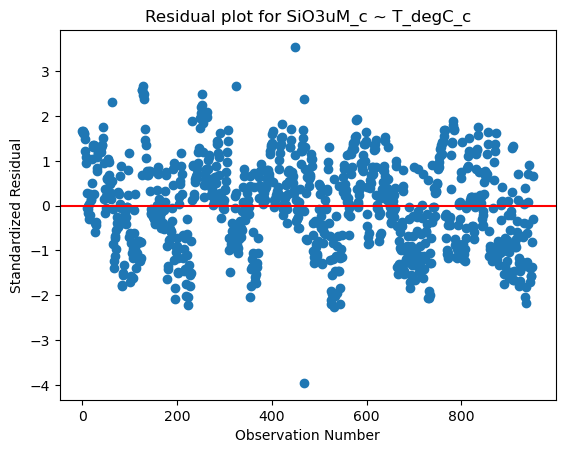

In [456]:
stdres=pd.DataFrame(reg1.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual plot for SiO3uM_c ~ T_degC_c")

Text(0.5, 1.0, 'Residual plot for SiO3uM_c ~ Depthm_c ')

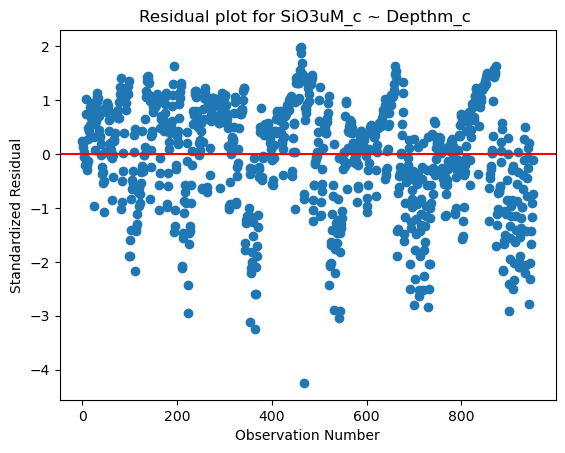

In [457]:
stdres=pd.DataFrame(reg2.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual plot for SiO3uM_c ~ Depthm_c ")

Text(0.5, 1.0, 'Residual plot for SiO3uM_c ~ PO4uM_c  ')

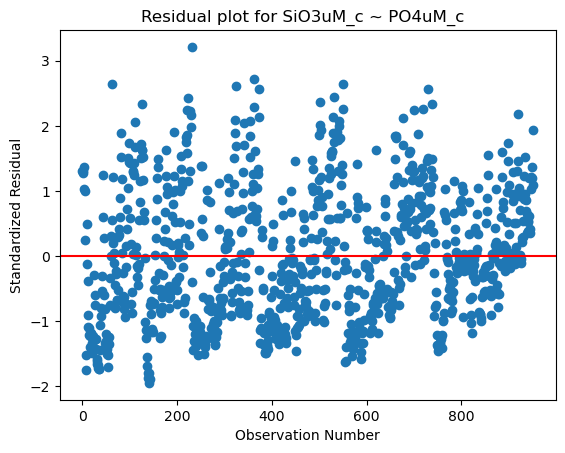

In [458]:
stdres=pd.DataFrame(reg3.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual plot for SiO3uM_c ~ PO4uM_c  ")

Text(0.5, 1.0, 'Residual plot for all variables - \nSiO3uM_c ~ PO4uM_c + T_degC_c + Depthm_c\n')

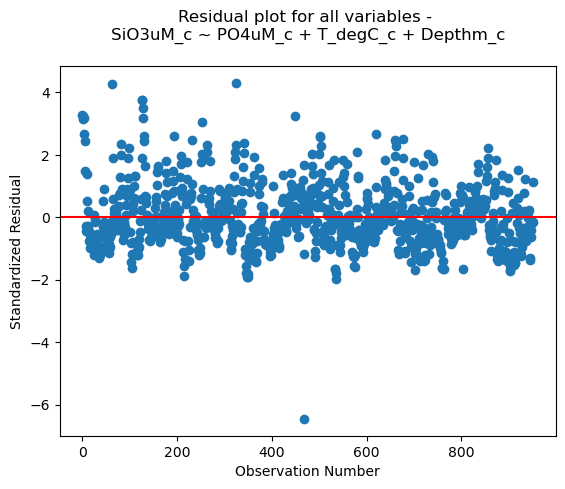

In [459]:
stdres=pd.DataFrame(reg4.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual plot for all variables - " + '\n' + "SiO3uM_c ~ PO4uM_c + T_degC_c + Depthm_c" + '\n')

Text(0.5, 1.0, 'Residual plot for strong corellated variables \nSiO3uM_c ~ PO4uM_c + Depthm_c\n')

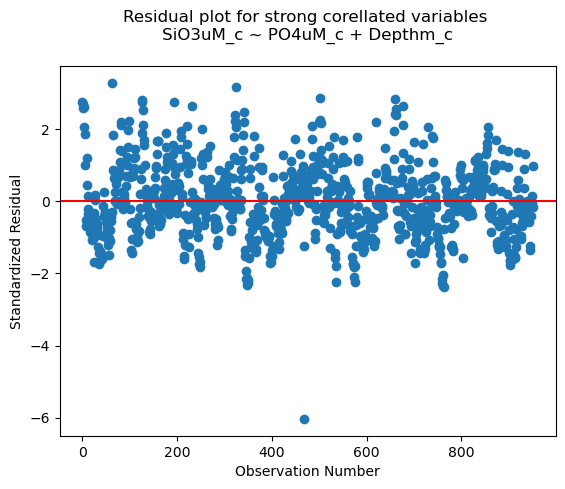

In [460]:
stdres=pd.DataFrame(reg5.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual plot for strong corellated variables " + '\n' + "SiO3uM_c ~ PO4uM_c + Depthm_c" + '\n')

## Standard Deviations

### Percentage of observations over 2 standardized deviation

In [463]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

5.351521511017839


### Percentage of observations over 2.5 standardized deviation

In [465]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

1.6789087093389297
